In [1]:
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [2]:
print("Loading datasets...")
training_data = pd.read_csv('emails.csv')
evaluation_data = pd.read_csv('spam_ham_dataset.csv')

Loading datasets...


**Training Data Head**

In [3]:
training_data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


**Training Data Tail**

In [11]:
training_data.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


**Evaluation Data Head**

In [4]:
evaluation_data.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


**Evaluation Data Tail**

In [12]:
evaluation_data.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [6]:
print("Training data:")
print("Number of rows are: ",training_data.shape[0])
print("Number of columns are: ",training_data.shape[1])

Training data:
Number of rows are:  5728
Number of columns are:  2


In [7]:
print("Evaluation data:")
print("Number of rows are: ",evaluation_data.shape[0])
print("Number of columns are: ",evaluation_data.shape[1])

Evaluation data:
Number of rows are:  5171
Number of columns are:  4


**Checking for the classes in Training Data**

In [13]:
training_data.groupby('spam').size()

,0
spam,
0,4360
1,1368


**Checking for the classes in Evaluation Data**

In [14]:
evaluation_data.groupby('label').size()

,0
label,
ham,3672
spam,1499


In [8]:
import matplotlib.pyplot as plt

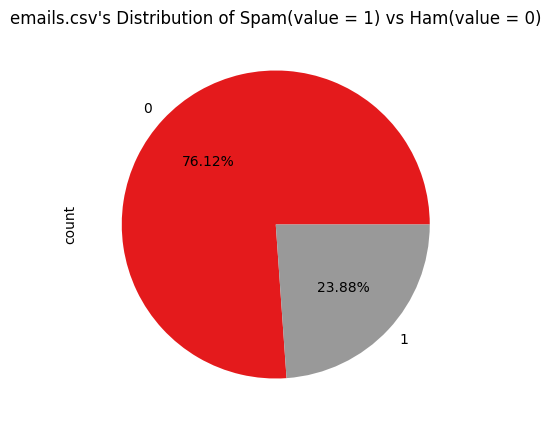

In [9]:
spread = training_data['spam'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f"emails.csv's Distribution of Spam(value = 1) vs Ham(value = 0)")

# Display the Chart
plt.show()

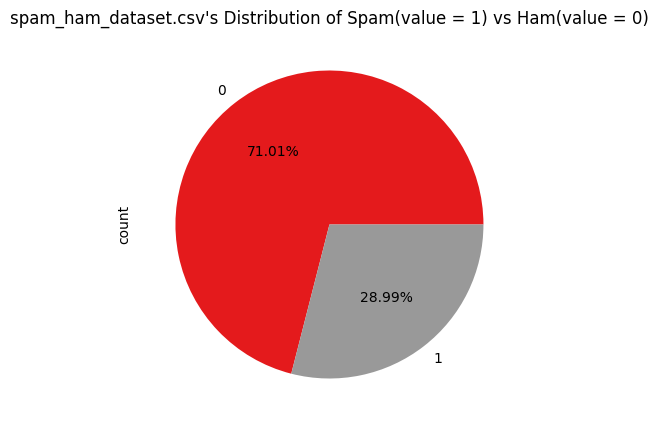

In [10]:
spread = evaluation_data['label_num'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f"spam_ham_dataset.csv's Distribution of Spam(value = 1) vs Ham(value = 0)")

# Display the Chart
plt.show()

**The Decision Tree Classifier Model**

In [21]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
class SpamDetector:
    df_train = None
    df_test = None
    classifier = None
    vectorizer = None
    y_test = None
    y_pred = None

    def __init__(self):
        self.df_train = pd.read_csv('emails.csv')
        self.df_test = pd.read_csv('spam_ham_dataset.csv')
        self.punctuations = "\'\"\,<>./?@#$%^&*_~/!()-[]{};:"
        self.stop_words = stopwords.words('english')

    def createClassifier(self):
        self.classifier = DecisionTreeClassifier()
        self.vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

    def train(self):
        x_train = self.df_train['text']
        y_train = self.df_train['spam']
        x_train_transformed = self.vectorizer.fit_transform(x_train)
        self.classifier.fit(x_train_transformed, y_train)

    def predict(self):
        x_test = self.df_test['text']
        y_test = self.df_test['label_num']
        x_test_transformed = self.vectorizer.transform(x_test)
        y_pred = self.classifier.predict(x_test_transformed)
        self.y_test = y_test
        self.y_pred = y_pred

    def accuracyAndReport(self):
        accuracy = accuracy_score(self.y_test, self.y_pred)
        print(f'Accuracy: {accuracy:.2f}')
        print('Classification Report:')
        print(classification_report(self.y_test, self.y_pred))
        print('Confusion Matrix:')
        print(confusion_matrix(self.y_test, self.y_pred))

    def predict_spam_probability(self, email_text):
        email_text = self.read_and_preprocess_email_text(email_text)
        email_transformed = self.vectorizer.transform([email_text])
        spam_probability = self.classifier.predict_proba(email_transformed)[0][1]
        return spam_probability

    def read_and_preprocess_email_text(self, email_text):
        punctuations = self.punctuations
        stop_words = self.stop_words
        numbers = "1234567890"
        html_removal = re.compile('<.*?>')
        line = email_text
        line = line.strip()
        line = line.lower()
        line_word = line.split()
        for wd in line_word:
            if wd in stop_words:
                line_word.remove(wd)
        line = ' '.join(line_word)
        line = re.sub(html_removal, ' ', line)
        for char in punctuations:
            line = line.replace(char, ' ')
        for char in numbers:
            line = line.replace(char, ' ')
        words = []
        line_word = line.split()
        for wd in line_word:
            if wd not in stop_words:
                words.append(wd)
        email_text =  ' '.join(words)
        return email_text

In [24]:
print('This is the Decision Tree Classifier')
decisionTreeClassifier = SpamDetector()
decisionTreeClassifier.createClassifier()
decisionTreeClassifier.train()
decisionTreeClassifier.predict()
decisionTreeClassifier.accuracyAndReport()
print("--------------------------------------------------------------")
print(decisionTreeClassifier.predict_spam_probability("Subject: hot stock info : drgv announces another press release  a $ 3 , 800 investment could be worth $ 50 , 000 in a short period of time . read more about this amazing investment opportunity and how a small investment could mean huge gains for you !  there  is no doubt that china stocks , which are new to u . s . stock markets , are destined to blast off . it happens time and time and time  again . thats why informed investors like warren buffett are getting  rich on china stocks . the market is enormous and now its your  turn . the upside potential for drgv is huge . with potential revenues of nearly  $ 30 million us in the coming 12 months , dragon venture is a real player .  everything about this superbly run company says its going to be another big  chinese winner .  warren buffett  said u . s . stocks are too expensive so he poured a chunk of his money into china . everyone knows what happens when mr . buffett gets into a market , it usually explodes !  here is why we are placing a  target price of $ 1 . 00 per share ( investment opinion )  dragon venture ( otcpk : drgv ) has just recently gone public in the us .  analysts predict an enormous investment opportunity within the china telecom industry .  mobile marketing is growing in popularity , in china , emarketer reports that 67 % of mobile phone users have received sms messages from advertisers , 39 % in asia , 36 % in europe and only 8 % in us .  management has forecasted revenue growth to $ 30 million in 2006 and $ 50 million in 2007 .  short messaging services ( sms ) is a strong telecom niche . this is an asian phenomenon ! !  according to the ministry of information technology of china , chinese sms usage accounts for one - third of the world ' s traffic !  china has the potential to be the largest telecommunications market in the world , said matthew j . flanigan , u . s . telecommunications industry president .  drgv won ' t be selling at $ 0 . 0775 a share for long . within days , the buzz about this company will spread on the street . the stock is ready to move up for a breakout to $ . 50 to $ 1 per share . drgv is a must buy for any micro - cap investors . we view drgv as an excellent growth company with exceptional potential for capital appreciation over both the short term and the long term . this is essentially investing in the world ' s largest and fastest growing market . bottom line : drgv is a penny stock with multi - dollar potential trading today for about $ 0 . 0775 / share . we are targeting the stock to trade in the range of $ 1 a share . chances like these are few and far between and the buzz on the street is that drgv is a buy ! who knows when you ' ll have another chance to turn such a huge profit again ? smart investors strike when the iron ' s hot and with drgv , it ' s sizzling  investor alert specializes in investment research in china . we are not registered investment advisor or broker / dealer . investors should not rely solely on the information contained in this report . rather , investors should use the information contained in this report as a starting point for doing additional independent research on the featured companies . factual statements in this report are made as of the date stated and are subject to change without notice . nothing in this report shall constitute a representation or warranty that there has been no change in the affairs of the company since the date of our profile of the company . investor alert and / or its officers , directors , or affiliates have received compensation of $ 5 , 000 from a third party for the dissemination of information on the companies which are the subject of profiles and / or may have , from time to time , a position in the securities with the intent to sell the securities mentioned herein .  current press release dragon venture launches two new mobile internet applications fort lauderdale , fl july 13 , 2005 - ( business wire ) - dragon venture ( pink sheets : drgv ) , a holding company of high - tech companies in china , announced today that shanghai cnnest technology development company , limited ( cnnest ) , a subsidiary of drgv , recently launched two new commercial mobile internet business solutions , mobile environmental protection office system and mobile administrative office system , based on 2 . 5 g wireless technology .  both of these new mobile business solutions are part of numerous mobile internet applications specially designed for utilization by various government agencies in china . this launch was a stated goal of cnnest in 2005 and accomplished on time . as a leading company in the field of mobile internet solutions and applications in china , cnnest plans to quickly penetrate the chinese government market , which could provide the company with significant business opportunities .  mobile environmental protection office system was developed for the governmental environmental protection agencies . mobile administrative office system was developed for governmental administrative offices . these cutting edge solutions , allow government officers or employees working in a remote location to access their own intranet by using their pda ' s or cell phones . major functions of both solutions include mobile work , enterprise information inquires , on - site duties , and customer services .  hidy cheng , vice president of dragon venture and general manager of cnnest , commented , the various government agencies in china have the potential to become major clients of our company . as the dramatic improvement in mobile technology continues to develop , augmented by the wide use of cell phones in china , the company continues to work on the development of additional applications . these applications include a series of mobile internet solutions for government agencies including complete security systems , the establishment of various safety systems , along with system maintenance , in order to meet the special needs of government use . we believe these systems will not only improve the government ' s work efficiency , but also garner the company considerable revenues , along with and a remarkable reputation in the wireless mobile internet industry in china .  about dragon venture  dragon venture ( dragon ) is doing business in china through its subsidiaries . dragon was established to serve as a conduit between chinese high - growth companies and western investors . the current focus of dragon is on the development of wireless 3 g - based applications and business solutions . two companies that dragon has acquired are among the leading providers of mobile internet applications and business solutions in china . as china emerges as a growing force on the global stage , dragon ' s professionals will provide invaluable services for western investors seeking to gain access to the chinese high - tech economy . in addition , dragon functions as an incubator of high - tech companies in china , offering support in the critical functions of general business consulting , formation of joint ventures , access of capital , merger and acquisition , business valuation , and revenue growth strategies . dragon will develop a portfolio of high - tech companies operating in china . our focus will be on innovative technological applications , which are poised to alter the competitive landscape of the industry . in addition , the company acquires and invests in innovative technology companies in china or forms joint ventures with both american and chinese companies , focusing on emerging technology industries including telecommunication , information technology , wireless applications , and other high - tech industries .  safe harbor statement  certain statements set forth in this press release constitute forward - looking statements . forward - looking statements include , without limitation , any statement that may predict , forecast , indicate , or imply future results , performance or achievements , and may contain the words estimate , project , intend , forecast , anticipate , plan , planning , expect , believe , will likely , should , could , would , may or words or expressions of similar meaning . such statements are not guarantees of future performance and are subject to risks and uncertainties that could cause the company ' s actual results and financial position to differ materially from those included within the forward - looking statements . forward - looking statements involve risks and uncertainties , including those relating to the company ' s ability to grow its business . actual results may differ materially from the results predicted and reported results should not be considered as an indication of future performance . the potential risks and uncertainties include , among others , the company ' s limited operating history , the limited financial resources , domestic or global economic conditions - - especially those relating to china , activities of competitors and the presence of new or additional competition , and changes in federal or state laws , restrictions and regulations on doing business in a foreign country , in particular china , and conditions of equity markets .  dragon venture 335 guoding rd . building 2 , ste . 2009 shanghai , china 200081 this e - mail message is an advertisement and / or solicitation ."))
print(decisionTreeClassifier.predict_spam_probability("View in browser|nytimes.com Ad From The Times October 27, 2024 Ahi steak, akami sashimi, albacore on sourdough: Tuna is tasty and versatile. But is it good for you? And should you be worried about its mercury content? Cuts of raw tuna are stacked on top of one another. A test tube of mercury leans against the stack. Bobbi Lin for The New York Times Here’s what to know before you pop open a can of tuna. → Essential news and guidance to live your healthiest life.	 Sign up for the Well newsletter, for Times subscribers only. Essential news and guidance to live your healthiest life. Get it in your inbox Ad Ad Need help? Review our newsletter help page or contact us for assistance. You received this message because you signed up for updates from The New York Times. To stop receiving From The Times, unsubscribe. To opt out of other promotional emails from The Times, including those regarding The Athletic, manage your email settings. To opt out of updates and offers sent from The Athletic, submit a request. Subscribe to The Times Connect with us on: facebook	x	instagram	whatsapp Change Your EmailPrivacy PolicyContact UsCalifornia Notices LiveIntent LogoAdChoices Logo The New York Times Company. 620 Eighth Avenue New York, NY 10018"))

This is the Decision Tree Classifier
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3672
           1       0.69      0.85      0.76      1499

    accuracy                           0.84      5171
   macro avg       0.81      0.85      0.82      5171
weighted avg       0.86      0.84      0.85      5171

Confusion Matrix:
[[3087  585]
 [ 221 1278]]
--------------------------------------------------------------
1.0
1.0


**Random Forest Model**

In [26]:
import pandas as pd
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk

In [27]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess the email text
def preprocess_text(text):
    text = text.lower()                       # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)      # Remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

# Step 1: Load and preprocess the training dataset
train_df = pd.read_csv('emails.csv')  # Replace with the actual path to the training CSV
train_df['text'] = train_df['text'].apply(preprocess_text)

# Step 2: Vectorize the training data using TF-IDF
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to top 1000 features for simplicity
X_train = vectorizer.fit_transform(train_df['text']).toarray()
y_train = train_df['spam']

# Step 3: Train the Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Step 4: Load and preprocess the evaluation dataset
eval_df = pd.read_csv('spam_ham_dataset.csv')  # Replace with the actual path to the evaluation CSV
eval_df['text'] = eval_df['text'].apply(preprocess_text)

# Vectorize the evaluation data using the same TF-IDF vectorizer
X_eval = vectorizer.transform(eval_df['text']).toarray()
y_eval = eval_df['label_num']

# Step 5: Evaluate the model on the evaluation dataset
y_pred_eval = clf.predict(X_eval)

# Display the results
print("Evaluation Accuracy:", accuracy_score(y_eval, y_pred_eval))
print("Evaluation Classification Report:\n", classification_report(y_eval, y_pred_eval))
print("Evaluation Confusion Matrix:\n", confusion_matrix(y_eval, y_pred_eval))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Evaluation Accuracy: 0.9160703925739703
Evaluation Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.94      3672
           1       0.88      0.82      0.85      1499

    accuracy                           0.92      5171
   macro avg       0.91      0.89      0.90      5171
weighted avg       0.92      0.92      0.92      5171

Evaluation Confusion Matrix:
 [[3510  162]
 [ 272 1227]]


**Bayes Classifier Model**

In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import re

In [42]:
def preprocess_text(text):
    """
    Preprocesses the email text by:
    1. Converting to lowercase
    2. Removing special characters
    3. Removing multiple spaces
    4. Basic email-specific cleaning
    """
    # Convert to string in case we have any non-string types
    text = str(text)

    # Convert to lowercase
    text = text.lower()

    # Remove email headers (if present)
    text = re.sub(r'^subject:', '', text)

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', ' url ', text, flags=re.MULTILINE)

    # Remove email addresses
    text = re.sub(r'\S+@\S+', ' email ', text)

    # Remove special characters but keep letters, numbers and spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

def create_spam_detector(training_data):
    """
    Creates and trains the spam detector using the training dataset.
    """
    # Create preprocessing pipeline
    preprocessor = FunctionTransformer(lambda x: [preprocess_text(text) for text in x])

    # Create TF-IDF vectorizer with improved parameters
    vectorizer = TfidfVectorizer(
        max_features=5000,
        min_df=2,
        max_df=0.7,
        ngram_range=(1, 2),
        stop_words='english'
    )

    # Create pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('vectorizer', vectorizer),
        ('classifier', MultinomialNB(alpha=0.1))
    ])

    # Train the model on the entire training dataset
    X_train = training_data['text']
    y_train = training_data['spam']
    pipeline.fit(X_train, y_train)

    return pipeline

def evaluate_model(pipeline, eval_data):
    """
    Evaluates the model performance using the evaluation dataset.
    """
    X_eval = eval_data['text']
    y_eval = eval_data['label_num']  # Using label_num column which has 0/1 values

    # Make predictions
    y_pred = pipeline.predict(X_eval)
    y_pred_proba = pipeline.predict_proba(X_eval)

    # Calculate and print metrics
    print("Model Performance Evaluation on External Dataset:")
    print("-" * 50)
    print("\nClassification Report:")
    print(classification_report(y_eval, y_pred))

    print("\nConfusion Matrix:")
    conf_matrix = confusion_matrix(y_eval, y_pred)
    print(conf_matrix)

    print("\nDetailed Metrics:")
    print(f"Accuracy: {accuracy_score(y_eval, y_pred):.4f}")

    return {
        'accuracy': accuracy_score(y_eval, y_pred),
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'confusion_matrix': conf_matrix,
        'classification_report': classification_report(y_eval, y_pred)
    }

def predict_email(pipeline, email_text):
    """
    Predicts whether a new email is spam or not.
    """
    prediction = pipeline.predict([email_text])[0]
    probability = pipeline.predict_proba([email_text])[0]

    confidence = probability[1] if prediction == 1 else probability[0]

    result = {
        'is_spam': bool(prediction),
        'confidence': confidence,
        'probability_spam': probability[1],
        'probability_ham': probability[0]
    }

    return result

In [43]:
# Load both datasets
print("Loading datasets...")
training_data = pd.read_csv('emails.csv')
evaluation_data = pd.read_csv('spam_ham_dataset.csv')

# Print dataset shapes
print(f"\nTraining dataset shape: {training_data.shape}")
print(f"Evaluation dataset shape: {evaluation_data.shape}")

# Create and train the model using the training dataset
print("\nTraining model on emails.csv...")
spam_detector = create_spam_detector(training_data)

# Evaluate the model using the evaluation dataset
print("\nEvaluating model on spam_ham_dataset.csv...")
evaluation_results = evaluate_model(spam_detector, evaluation_data)

# Example of predicting a new email
new_email = """Subject: Docker's Impact on Development From day one, Docker revolutionized software development — transforming the landscape with containers and simplified, cross-platform workflows. Since then, we've become the #1 platform for software developers worldwide.

Read about how Docker continues to pave the way for software development in this white paper by Steven J. Vaughan-Nichol, Docker: The software development revolution continued. Inside, you'll uncover:
An in-depth dive into Docker's comprehensive ecosystem
A glimpse into a developer's day empowered by Docker
How Docker's dev tools accelerate innovation by enhancing flexibility, security, and rapid software delivery
Don't miss out on discovering how you can unlock innovation by leveraging the complete potential of Docker's comprehensive container development stack.
Get the most out of Docker
Check out our subscription offerings or contact our sales team to start accelerating innovation with Docker today."""

print("\nExample Prediction:")
result = predict_email(spam_detector, new_email)
print(f"Is spam: {result['is_spam']}")
print(f"Confidence: {result['confidence']:.4f}")
print(f"Spam probability: {result['probability_spam']:.4f}")
print(f"Ham probability: {result['probability_ham']:.4f}")

Loading datasets...

Training dataset shape: (5728, 2)
Evaluation dataset shape: (5171, 4)

Training model on emails.csv...

Evaluating model on spam_ham_dataset.csv...
Model Performance Evaluation on External Dataset:
--------------------------------------------------

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3672
           1       0.91      0.82      0.87      1499

    accuracy                           0.93      5171
   macro avg       0.92      0.90      0.91      5171
weighted avg       0.93      0.93      0.92      5171


Confusion Matrix:
[[3554  118]
 [ 264 1235]]

Detailed Metrics:
Accuracy: 0.9261

Example Prediction:
Is spam: True
Confidence: 0.7510
Spam probability: 0.7510
Ham probability: 0.2490


**Model Analysis Summary**

In [34]:
model1 = decisionTreeClassifier
model2 = clf
model3 = spam_detector

In [45]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier\n")
print("Accuracy")
print(accuracy_score(model1.y_test, model1.y_pred))
print("\n")
print("Confusion Matrix:")
print(confusion_matrix(model1.y_test, model1.y_pred))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("\nDecision Tree Classifier\n")
print("Accuracy")
print(accuracy_score(y_eval, y_pred_eval))
print("\n")
print("Confusion Matrix: ")
print(confusion_matrix(y_eval, y_pred_eval))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("\nMultinomial Naïve Bayes\n")
print("Accuracy")
print(evaluation_results["accuracy"])
print("\n")
print("Confusion Matrix: ")
print(evaluation_results["confusion_matrix"])

Random Forest Classifier

Accuracy
0.8441307290659447


Confusion Matrix:
[[3087  585]
 [ 221 1278]]
--------------------------------

Decision Tree Classifier

Accuracy
0.9160703925739703


Confusion Matrix: 
[[3510  162]
 [ 272 1227]]
--------------------------------

Multinomial Naïve Bayes

Accuracy
0.9261264745697158


Confusion Matrix: 
[[3554  118]
 [ 264 1235]]


In [46]:
# Model 1 - Random Forest Classifier
print("Random Forest Classifier\n")
print("Classification Report")
print(classification_report(model1.y_test, model1.y_pred))
print("--------------------------------")

# Model 2 - Decision Tree Classifier
print("\nDecision Tree Classifier\n")
print("Classification Report")
print(classification_report(y_eval, y_pred_eval))
print("--------------------------------")

# Model 3 - Multinomial Naïve Bayes
print("\nMultinomial Naïve Bayes\n")
print("Classification Report")
print(evaluation_results["classification_report"])

Random Forest Classifier

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.84      0.88      3672
           1       0.69      0.85      0.76      1499

    accuracy                           0.84      5171
   macro avg       0.81      0.85      0.82      5171
weighted avg       0.86      0.84      0.85      5171

--------------------------------

Decision Tree Classifier

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3672
           1       0.88      0.82      0.85      1499

    accuracy                           0.92      5171
   macro avg       0.91      0.89      0.90      5171
weighted avg       0.92      0.92      0.92      5171

--------------------------------

Multinomial Naïve Bayes

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      3672
           1       0.91   

**As we can see, Best Model is Multinomial Naïve Bayes**

**Now we can build a sample automated spam detector**

In [49]:
while(True):
  text = input("Enter your text, Enter quit to quit: ")
  if text == "quit":
    break
  print("\nExample Prediction:")
  result = predict_email(spam_detector, text)
  print(f"Is spam: {result['is_spam']}")
  print(f"Confidence: {result['confidence']:.4f}")
  print(f"Spam probability: {result['probability_spam']:.4f}")
  print(f"Ham probability: {result['probability_ham']:.4f}")

Enter your text, Enter quit to quit: quit
